In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

In [12]:
df = pd.read_csv('laptop_pricing.csv')

In [13]:
df.isna().sum()

Manufacturer             0
IntelCore(i-)            0
IntelCoreGen             0
processing speed(GHz)    0
Ram(gb)                  9
HDD(gb)                  0
SSD(gb)                  0
Graphics(gb)             0
ScreenSize(inch)         0
Price                    0
dtype: int64

In [14]:
df['Ram(gb)']

0       4.0
1       4.0
2       8.0
3       NaN
4       4.0
       ... 
100    16.0
101     8.0
102     8.0
103    32.0
104     8.0
Name: Ram(gb), Length: 105, dtype: float64

In [15]:
meadian_value = df['Ram(gb)'].median()

In [16]:
df['Ram(gb)'] = df['Ram(gb)'].fillna(meadian_value ,axis=0)

In [17]:
df.isna().sum()

Manufacturer             0
IntelCore(i-)            0
IntelCoreGen             0
processing speed(GHz)    0
Ram(gb)                  0
HDD(gb)                  0
SSD(gb)                  0
Graphics(gb)             0
ScreenSize(inch)         0
Price                    0
dtype: int64

In [18]:
df.head()

,Manufacturer,IntelCore(i-),IntelCoreGen,processing speed(GHz),Ram(gb),HDD(gb),SSD(gb),Graphics(gb),ScreenSize(inch),Price
0,Dell,3,7,2.29,4.0,1000,0,0,15.6,39057
1,Dell,3,7,2.30,4.0,1000,0,0,15.6,45141
2,HP,3,7,2.30,8.0,256,256,0,14.0,35999
3,ASUS,3,7,2.30,8.0,1000,0,0,14.0,39990
4,HP,3,7,2.40,4.0,1000,0,0,15.6,36263


In [19]:
df['Manufacturer'].unique()

array(['Dell', 'HP', 'ASUS', 'Lenovo'], dtype=object)

In [25]:
df.shape

(105, 13)

In [20]:
df = pd.get_dummies(df ,columns=['Manufacturer'])
df.head()

,IntelCore(i-),IntelCoreGen,processing speed(GHz),Ram(gb),HDD(gb),SSD(gb),Graphics(gb),ScreenSize(inch),Price,Manufacturer_ASUS,Manufacturer_Dell,Manufacturer_HP,Manufacturer_Lenovo
0,3,7,2.29,4.0,1000,0,0,15.6,39057,0,1,0,0
1,3,7,2.30,4.0,1000,0,0,15.6,45141,0,1,0,0
2,3,7,2.30,8.0,256,256,0,14.0,35999,0,0,1,0
3,3,7,2.30,8.0,1000,0,0,14.0,39990,1,0,0,0
4,3,7,2.40,4.0,1000,0,0,15.6,36263,0,0,1,0


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import  tree
from sklearn.tree import plot_tree

In [23]:
X = df.drop('Price' , axis=1)
y=df['Price']

In [24]:
X.shape , y.shape

((105, 12), (105,))

In [26]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
regtree = DecisionTreeRegressor(max_depth=3)
regtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [28]:
y_train_pred = regtree.predict(X_train)
y_test_pred = regtree.predict(X_test)

In [29]:
from sklearn.metrics import r2_score , accuracy_score , mean_squared_error

In [30]:
r2_score(y_test , y_test_pred)

0.8962471809191989

In [31]:
r2_score(y_train , y_train_pred)

0.9850079292513182

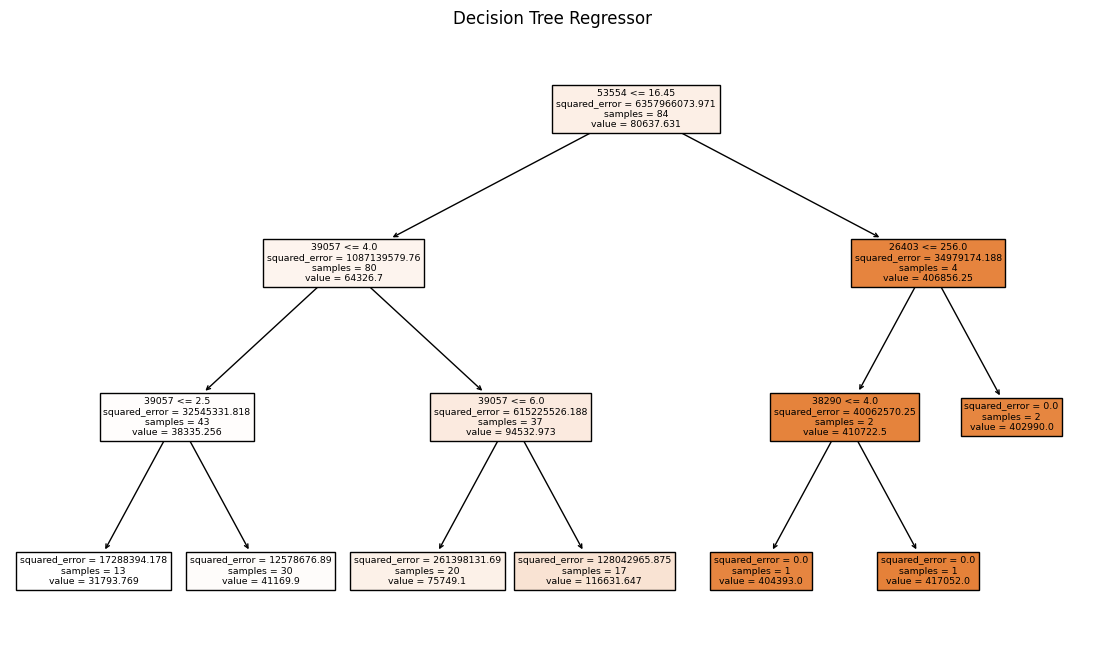

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))
plot_tree(regtree, filled=True, feature_names=y)
plt.title("Decision Tree Regressor")
plt.show()